<a href="https://colab.research.google.com/github/MathurUtkarsh/Churn_Model_using_ANN/blob/main/Churn_Model_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network**

## Part 1 - Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
# Create dummy variables.
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [7]:
X=pd.concat([X,geography,gender],axis=1)

In [8]:
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - ANN Model

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
classifier = Sequential()

In [26]:
classifier.add(Dense(6, activation='relu', kernel_initializer ='he_uniform',input_dim=11))

In [29]:
classifier.add(Dense(6,  kernel_initializer = 'he_uniform',activation='relu'))

In [30]:
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [31]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5913 - accuracy: 0.7962 - val_loss: 0.5441 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5301 - accuracy: 0.7962 - val_loss: 0.5167 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.7962 - val_loss: 0.5012 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4934 - accuracy: 0.7962 - val_loss: 0.4900 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.7962 - val_loss: 0.4798 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4703 - accuracy: 0.7962 - val_loss: 0.4722 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.7962 - val_loss: 0.4661 - val_accuracy: 0.7955

In [34]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


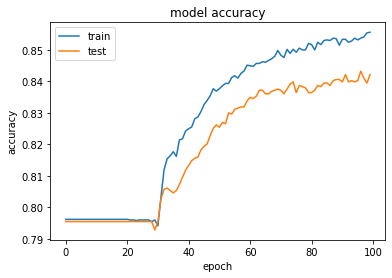

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

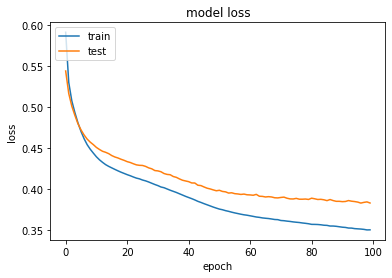

In [42]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 3 - Making the Prediction

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [46]:
print(score)

0.8485
